In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv(os.path.join("data", "processed", "all_data.csv"))
vote_share_cols = [col for col in df.columns if col.startswith("vote_share_")]
df.drop(columns=vote_share_cols, inplace=True)

In [3]:
df_typo = df["typology"] # needed for stratification below
df = pd.get_dummies(df, columns=["language", "canton", "typology"])

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df_typo)
X_train = df_train.drop(columns=["name", "po_value"]).values
y_train = df_train["po_value"].values
X_test = df_test.drop(columns=["name", "po_value"]).values
y_test = df_test["po_value"].values

print("X_train.shape = {}".format(X_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("X_test.shape = {}".format(X_test.shape))
print("y_test.shape = {}".format(y_test.shape))

X_train.shape = (1756, 88)
y_train.shape = (1756,)
X_test.shape = (440, 88)
y_test.shape = (440,)


In [4]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
print("Dummy MAE = {:.3f}".format(mean_absolute_error(y_test, dummy.predict(X_test))))

Dummy MAE = 0.315


In [5]:
ridge = Pipeline([
    ('stdscaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge.fit(X_train, y_train)
ridge_test_pred = ridge.predict(X_test)
print("Ridge MAE = {:.3f}".format(mean_absolute_error(y_test, ridge_test_pred)))
print("Ridge R^2 = {:.3f}".format(ridge.score(X_test, y_test)))

Ridge MAE = 0.169
Ridge R^2 = 0.700


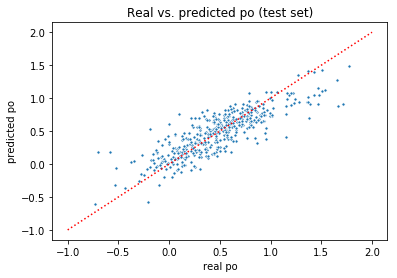

In [6]:
sns.scatterplot(y_test, ridge_test_pred, s=10)
plt.xlabel("real po")
plt.ylabel("predicted po")
plt.title("Real vs. predicted po (test set)")
plt.plot([-1, 2], [-1, 2], color="red", linestyle=":")
plt.show()